In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

In [21]:
img_transformer =  transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [22]:
batch_size = 4

In [23]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                                       transform = img_transformer)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True,
                                        num_workers=2)

Files already downloaded and verified


In [24]:
trainloader

In [25]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                                       transform = img_transformer)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False,
                                        num_workers=2)

Files already downloaded and verified


In [26]:
!pip install ipywidgets

You should consider upgrading via the 'c:\users\clasa215b_nt17\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [27]:
!pip install tqdm

You should consider upgrading via the 'c:\users\clasa215b_nt17\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [28]:
classes = ('plane', 'car', 'bird','car','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [30]:
dataiter = iter(trainloader)
imges, labels = dataiter.next()

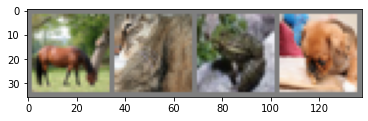

In [31]:
imshow(torchvision.utils.make_grid(imges))

In [32]:
' '.join('%5s' % classes[labels[j]] for j in range(batch_size))

'horse   car  frog   dog'

In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [34]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x =  torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [35]:
net = Net()

In [36]:
import torch.optim as optim
criterion =  nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr =0.001, momentum=0.9)

In [42]:
def train(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, device):
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    
    for epoch in range(n_epochs):
        
        for examples, labels in train_loader:
            examples = examples.to(device=device)
            labels = labels.to(device=device)
            
            outputs = model(examples)
            loss = loss_fn(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        for name, loader, accuracy in [
            ('train', train_loader, train_accuracy),
            ('test', test_loader, test_accuracy)
        ]:
            correct = 0
            total = 0
            with torch.no_grad():
                for examples, labels in loader:
                    examples = examples.to(device=device)
                    labels = labels.to(device=device)
                    
                    outputs = model(examples)
                    predicted = (torch.max(outputs, dim =1)[1]).type(torch.uint8)
                    total += labels.shape[0]
                    correct += int((predicted == labels).sum())
            accuracy[epoch] = correct / total
        
    plt.figure(dpi=150)
    plt.xlabel('Number of epochs')
    plt.ylabel("Accuracy")
    plt.plot(range(1, n_epochs + 1), train_accuracy)
    plt.plot(range(1, n_epochs + 1), test_accuracy)
    plt.legend(['Train Accuracy', 'Test Accuracy'])
    plt.grid()
    plt.show()
        
    

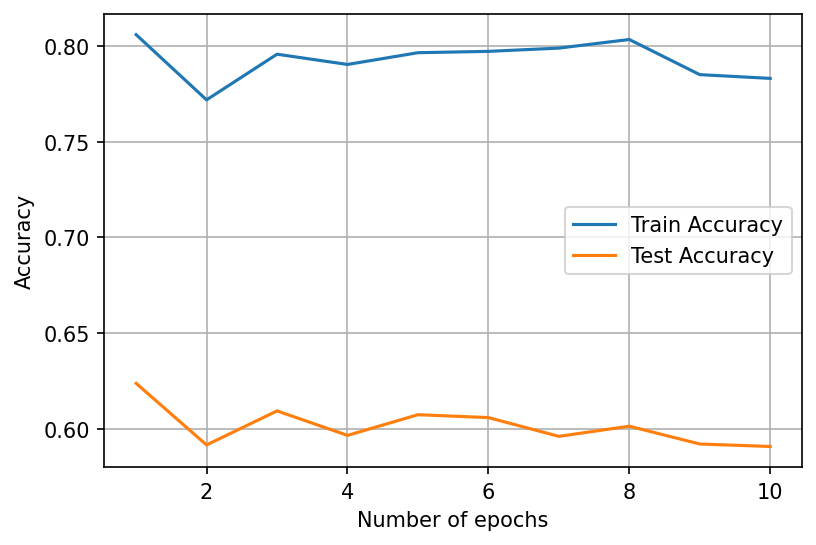

In [43]:
train(10, optimizer, net, criterion, trainloader, testloader, torch.device('cpu'))